Коэффициенты регрессии: [ 0.30180181 -1.48955857]
Свободный член: 74.66173653532755
Коэффициент детерминации R²: 0.4413906959018894

Средние значения холестерина и BMI по возрастным группам:
           Cholesterol        BMI
Age_Group                        
<20                NaN        NaN
20-40       200.323469  25.222090
40-60       200.480431  25.079207
60-80       199.775710  25.145831
>80                NaN        NaN


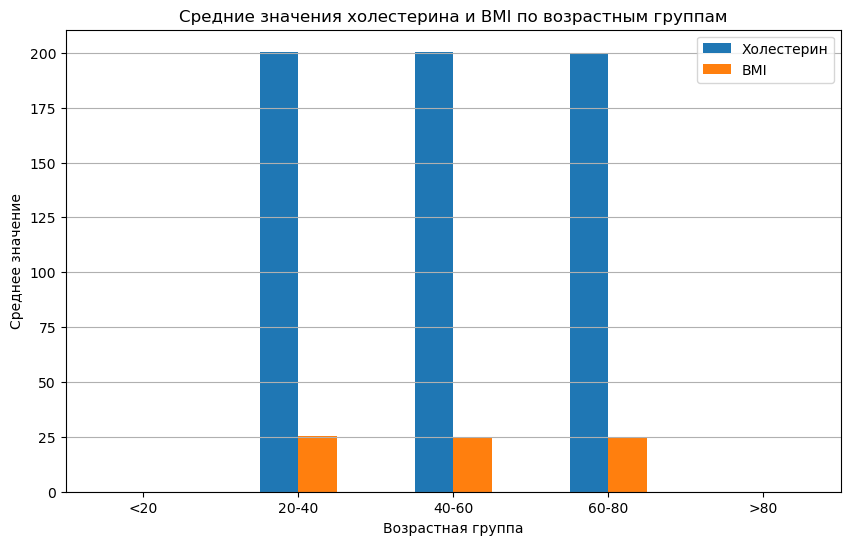

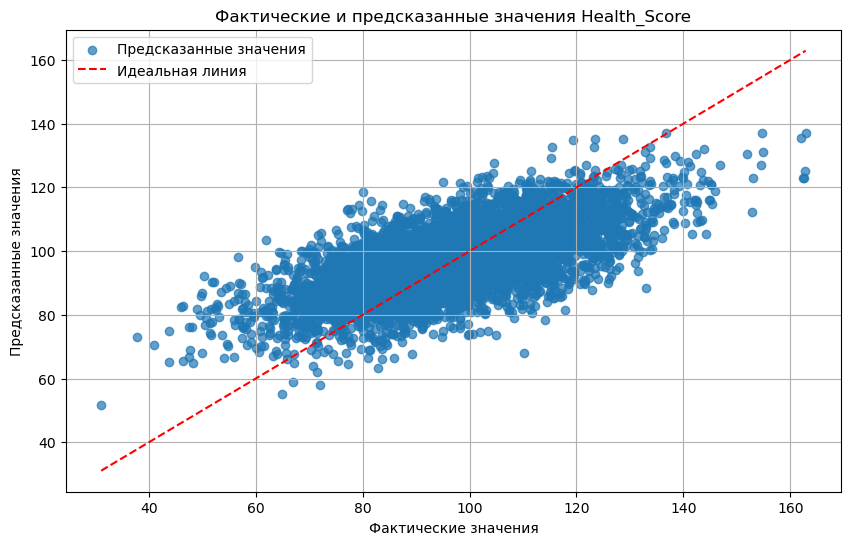

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('health_data.csv')

# Извлечение переменных
X = data[['Cholesterol', 'BMI']].values  # Признаки
y = data['Health_Score'].values  # Целевая переменная

# Построение линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов регрессии
print("Коэффициенты регрессии:", model.coef_)
print("Свободный член:", model.intercept_)

# Прогнозирование значений Health_Score
y_pred = model.predict(X)

# Оценка качества модели
r2_score = model.score(X, y)
print("Коэффициент детерминации R²:", r2_score)

# Группировка по возрастным группам и расчет средних значений
bins = [0, 20, 40, 60, 80, 100]  # Границы возрастных групп
labels = ['<20', '20-40', '40-60', '60-80', '>80']  # Метки возрастных групп
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Вычисление средних значений
group_means = data.groupby('Age_Group', observed=False)[['Cholesterol', 'BMI']].mean()
print("\nСредние значения холестерина и BMI по возрастным группам:")
print(group_means)

# Визуализация средних значений
group_means.plot(kind='bar', figsize=(10, 6))
plt.title('Средние значения холестерина и BMI по возрастным группам')
plt.ylabel('Среднее значение')
plt.xlabel('Возрастная группа')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(['Холестерин', 'BMI'])
plt.show()

# Визуализация линейной регрессии (пример для одного признака)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7, label='Предсказанные значения')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Идеальная линия')
plt.title('Фактические и предсказанные значения Health_Score')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv('health_data.csv')

# Шаг 1: Предсказание индекса здоровья с помощью случайного леса
X = data[['Age', 'Cholesterol', 'BMI']]
y = data['Health_Score']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели случайного леса
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Оценка точности модели случайного леса
y_pred_rf = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error of Random Forest: {mse:.2f}")

# Шаг 2: Добавление бинарного признака состояния здоровья
data['Health_Above_Avg'] = (data['Health_Score'] > data['Health_Score'].mean()).astype(int)

# Подготовка данных для логистической регрессии
X = data[['Age', 'Cholesterol', 'BMI']]
y_binary = data['Health_Above_Avg']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Нормализация
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели логистической регрессии
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Оценка точности логистической регрессии
y_pred_log = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Mean Squared Error of Random Forest: 113.12
Accuracy of Logistic Regression: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       485
           1       0.85      0.79      0.82       515

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

